# DAVE3625 Assignment 1
This assignment is solved by Uy Quoc Nguyen (s341864) and Anders Hagen Ottersland (s341883).

## Task 1: Feature Engineering You will be given a data set (from Ruter). Please do the following on this data set:

We will approach this task by doing all the subtasks intertwined. That is, as soon as a feature has been identified we will apply feature engineering on that feature.

First we import pandas to create a dataframe of [Ruter_data.csv](https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv) and matplotlib to display charts


In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

We create a data frame from [Ruter_data.csv](https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv)

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'
df = pd.read_csv(url, sep=';')
df

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,10001-2020-06-10T15:10:00+02:00,10/06/2020,Viken,Nordøst,Lillestrøm,Brauterkrysset,Nordsnoveien,Lokal,Viken,100,1,16:23:18,16:23:48,16:10:00,16:10:00,151,2
5996,10010-2020-06-23T05:54:00+02:00,23/06/2020,Viken,Nordøst,Lillestrøm,Vestbygata,Bjørnsons gate,Lokal,Viken,100,0,06:00:32,06:00:40,05:59:00,05:59:00,151,2
5997,2007-2020-06-11T17:22:00+02:00,11/06/2020,Oslo,Indre By,Sagene,Torshovparken (mot Torshovparken),Torshov (mot Bentsebrua),Lokal,Oslo,20,1,17:42:43,17:43:10,17:32:00,17:32:00,106,3
5998,10004-2020-08-13T04:59:00+02:00,13/08/2020,Oslo,Indre By,Gamle Oslo,Harald Hårdrådes plass (mot Grønland),Oslo gate (mot Grønland),Lokal,Viken,100,0,06:00:11,06:00:23,05:59:00,05:59:00,151,5


The first column that stands out is 'Fylke' we suspect that 'Fylke' is either 'Oslo' or 'Viken'. We check this with

In [3]:
df['Fylke'].value_counts()

Viken    4462
Oslo     1538
Name: Fylke, dtype: int64

As suspected 'Fylke' is either 'Oslo' or 'Viken'. Hence we can create a new column called 'I_Oslo'

In [4]:
df['I_Oslo'] = df['Fylke'] == 'Oslo'
df['I_Oslo']

0       False
1       False
2       False
3       False
4       False
        ...  
5995    False
5996    False
5997     True
5998     True
5999    False
Name: I_Oslo, Length: 6000, dtype: bool

Furthermore, we can also identify the how delayed the bus is arriving the station. We will add this as a new feature.

In [5]:
tid_faktisk_ankomst = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
tid_planlagt_ankomst = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Forsinket_Ankomst'] = tid_faktisk_ankomst - tid_planlagt_ankomst
df['Forsinket_Ankomst']

0        0 days 00:00:53
1        0 days 00:00:20
2      -1 days +23:59:56
3        0 days 00:01:04
4        0 days 00:01:13
              ...       
5995     0 days 00:13:18
5996     0 days 00:01:32
5997     0 days 00:10:43
5998     0 days 00:01:11
5999     0 days 00:02:44
Name: Forsinket_Ankomst, Length: 6000, dtype: timedelta64[ns]

It is also natural to take the delay on departure as a feature also

In [6]:
tid_faktisk_avgang = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
tid_planlagt_avgang = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], errors='coerce')
df['Forsinket_Avgang'] = tid_faktisk_avgang - tid_planlagt_avgang
df['Forsinket_Avgang']

0      0 days 00:00:59
1      0 days 00:00:26
2      0 days 00:00:21
3      0 days 00:01:26
4      0 days 00:01:53
             ...      
5995   0 days 00:13:48
5996   0 days 00:01:40
5997   0 days 00:11:10
5998   0 days 00:01:23
5999   0 days 00:02:48
Name: Forsinket_Avgang, Length: 6000, dtype: timedelta64[ns]

The next feature we have taken into consideration is the bus capacity. We have chosen to indicate how many seats are left on a particular bus in percentage due to the different bus sizes.

In [7]:
df['Prosent_Ledige_Plasser'] = (df['Kjøretøy_Kapasitet'] - df['Passasjerer_Ombord'])/df['Kjøretøy_Kapasitet']
df['Prosent_Ledige_Plasser']

0       0.955357
1       0.955357
2       0.946429
3       0.910714
4       0.910714
          ...   
5995    0.986755
5996    0.986755
5997    0.971698
5998    0.966887
5999    1.047619
Name: Prosent_Ledige_Plasser, Length: 6000, dtype: float64

In the end we chose to categorize the bus sizes by category.

In [8]:
df['Buss_Kategori'] = pd.qcut(df['Kjøretøy_Kapasitet'], q=3, labels=False)
df['Buss_Kategori']

0       1
1       1
2       1
3       1
4       1
       ..
5995    2
5996    2
5997    1
5998    2
5999    0
Name: Buss_Kategori, Length: 6000, dtype: int64

We will check our data at this point for non-values and try to identify them

In [9]:
df.isna().sum()

TurId                                          0
Dato                                           0
Fylke                                          0
Område                                         0
Kommune                                        0
Holdeplass_Fra                                 0
Holdeplass_Til                                 0
Linjetype                                      0
Linjefylke                                     0
Linjenavn                                      0
Linjeretning                                   0
Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra       0
Tidspunkt_Faktisk_Avgang_Holdeplass_Fra        0
Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra      0
Tidspunkt_Planlagt_Avgang_Holdeplass_Fra       0
Kjøretøy_Kapasitet                             0
Passasjerer_Ombord                             0
I_Oslo                                         0
Forsinket_Ankomst                            225
Forsinket_Avgang                             177
Prosent_Ledige_Plass

As we can see there are quite a number of NA values in two of our features. We need to identify why this is happening. If any issues were to occur, the issue should have been during the calculations of the delay time using 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'. We suspect that the datetime conversion were throwing an error. Hence, we would try to convert each and every time in the data frame and print all the error value to identify the issue.

In [10]:
for index, rows in df.iterrows():
    try:
        dt.datetime.strptime(df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], '%H:%M:%S')
    except ValueError:
        print(index, df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])

12 24:48:41
43 25:45:48
74 24:27:26
84 24:43:16
199 25:00:38
201 25:06:17
245 :
272 24:10:35
305 24:07:00
324 25:07:09
333 :
346 :
435 24:28:31
477 24:13:28
500 24:51:27
511 :
537 24:04:25
579 24:55:31
588 :
602 :
625 24:07:07
637 :
642 24:07:23
653 :
676 24:20:36
716 24:21:46
740 24:43:21
785 25:03:56
806 :
815 :
836 :
837 24:14:49
899 25:38:13
912 24:33:13
938 24:30:49
948 :
952 24:34:08
978 24:06:25
980 24:05:56
990 24:05:43
1018 :
1070 24:11:46
1132 24:26:03
1211 24:40:12
1250 24:15:22
1273 :
1296 25:00:22
1326 :
1334 25:43:17
1336 24:04:48
1359 24:35:07
1398 24:50:59
1418 25:05:42
1452 :
1465 24:48:27
1483 25:22:58
1499 :
1517 24:43:45
1548 24:58:18
1578 :
1595 24:45:46
1598 24:47:09
1615 25:05:46
1622 25:04:39
1626 24:15:52
1646 24:45:13
1658 :
1662 24:22:10
1664 25:15:12
1746 24:10:34
1758 25:22:56
1786 24:42:06
1814 :
1875 24:41:58
1893 24:17:48
1932 25:02:54
1950 25:03:46
1952 24:41:28
1957 25:25:02
1963 :
1975 :
2006 25:15:25
2012 24:40:57
2027 24:10:23
2053 24:45:06
2066 24:

As we suspected all these times were time given over 24 hours. Some were even ':'. We shall first pay attention to all the ':' datapoints. From the original dataframe we identify that 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra' is the same as 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'. We shall then just assume that 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra' = 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra' in the cases of ':' as well. Hence, we shall replace all thise values:

In [11]:
for index, row in df.iterrows():
    if df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] == ':':
        df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = df.loc[index, 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']
        print(index, df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])

245 01:22:34
333 17:40:55
346 13:57:17
511 07:51:46
588 06:55:18
602 06:18:59
637 19:45:27
653 14:13:58
806 17:54:06
815 13:42:56
836 09:57:33
948 19:40:31
1018 09:11:09
1273 19:05:06
1326 15:45:13
1452 10:41:41
1499 11:50:02
1578 15:25:35
1658 14:06:15
1814 06:40:23
1963 16:05:01
1975 08:58:50
2143 23:21:25
2924 12:29:23
3045 16:25:28
3142 17:08:02
3191 14:19:58
3209 18:07:41
3216 25:13:22
3284 12:20:38
3523 07:45:02
3615 15:19:07
3863 15:44:34
4206 10:54:21
4291 06:11:17
4320 09:14:55
4479 13:40:24
4500 14:41:07
4763 08:20:42
4916 10:09:45
4946 23:06:23
4947 17:27:43
5079 13:32:09
5109 09:29:56
5136 13:08:26
5152 12:43:49
5211 15:47:44
5433 01:33:58
5625 07:41:42
5922 12:34:21


As, we can see we have successfully replaced all the ':' values. Furthermore, we loop through again and replace all 24 with 00 and 25 with 01. For this we will need the re library:

In [12]:
import re

for index, rows in df.iterrows():
    try:
        dt.datetime.strptime(df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], '%H:%M:%S')
    except ValueError:
        h = re.search(r'(24+)|(25+)', df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']).group(0)
        s = '0' + str(int(h)-24)
        df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = s + df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'][2:]
        print(index, df.loc[index, 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])

12 00:48:41
43 01:45:48
74 00:27:26
84 00:43:16
199 01:00:38
201 01:06:17
272 00:10:35
305 00:07:00
324 01:07:09
435 00:28:31
477 00:13:28
500 00:51:27
537 00:04:25
579 00:55:31
625 00:07:07
642 00:07:23
676 00:20:36
716 00:21:46
740 00:43:21
785 01:03:56
837 00:14:49
899 01:38:13
912 00:33:13
938 00:30:49
952 00:34:08
978 00:06:25
980 00:05:56
990 00:05:43
1070 00:11:46
1132 00:26:03
1211 00:40:12
1250 00:15:22
1296 01:00:22
1334 01:43:17
1336 00:04:48
1359 00:35:07
1398 00:50:59
1418 01:05:42
1465 00:48:27
1483 01:22:58
1517 00:43:45
1548 00:58:18
1595 00:45:46
1598 00:47:09
1615 01:05:46
1622 01:04:39
1626 00:15:52
1646 00:45:13
1662 00:22:10
1664 01:15:12
1746 00:10:34
1758 01:22:56
1786 00:42:06
1875 00:41:58
1893 00:17:48
1932 01:02:54
1950 01:03:46
1952 00:41:28
1957 01:25:02
2006 01:15:25
2012 00:40:57
2027 00:10:23
2053 00:45:06
2066 00:39:22
2095 01:17:30
2131 00:05:32
2219 00:16:26
2271 00:11:03
2307 00:16:58
2493 00:31:04
2502 00:09:31
2551 00:41:36
2583 01:46:11
2588 00:36

We should the same with
- 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'
- 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'
- 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'
as well. We should do this with functions instead as it will become a tedious task.

In [13]:
def fix_nat(column1, column2):
    for index, rows in df.iterrows():
        if df.loc[index, column1] == ':':
            df.loc[index, column1] = df.loc[index, column2]
        try:
            dt.datetime.strptime(df.loc[index, column1], '%H:%M:%S')
        except ValueError:
            h = re.search(r'(24+)|(25+)', df.loc[index, column1]).group(0)
            s = '0' + str(int(h)-24)
            df.loc[index, column1] = s + df.loc[index, column1][2:]

We know just have to apply our function to the appropriate columns:

In [14]:
fix_nat('Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra')
fix_nat('Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra')
fix_nat('Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra')

After fixing all the times we can now create the columns 'Forsinket_Ankomst' and 'Forsinket_Avgang' again

In [15]:
tid_faktisk_ankomst = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'])
tid_planlagt_ankomst = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'])
df['Forsinket_Ankomst'] = tid_faktisk_ankomst - tid_planlagt_ankomst

tid_faktisk_avgang = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'])
tid_planlagt_avgang = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'])
df['Forsinket_Avgang'] = tid_faktisk_avgang - tid_planlagt_avgang

Now we need to fix the values in 'Prosent_Ledige_Plasser', because we can't have a capacity og over 100%

In [16]:
for index, row in df.iterrows():
    if df.loc[index, 'Prosent_Ledige_Plasser'] > 1.0:
        df.loc[index, 'Prosent_Ledige_Plasser'] = 1.0
    elif df.loc[index, 'Prosent_Ledige_Plasser'] < 0.0:
        df.loc[index, 'Prosent_Ledige_Plasser'] = 0.0

df['Prosent_Ledige_Plasser']

0       0.955357
1       0.955357
2       0.946429
3       0.910714
4       0.910714
          ...   
5995    0.986755
5996    0.986755
5997    0.971698
5998    0.966887
5999    1.000000
Name: Prosent_Ledige_Plasser, Length: 6000, dtype: float64

To visualize the new "prosent_Ledige_Plasser" feature we need to split the values into groups

<AxesSubplot:xlabel='kapasitet_kat'>

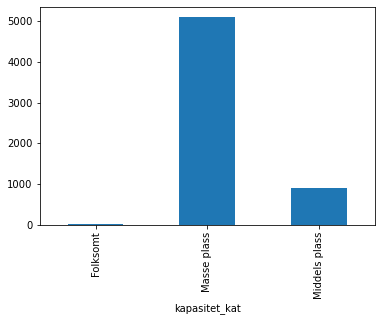

In [17]:
conditions = [
    (df['Prosent_Ledige_Plasser'] > 0.90) & (df['Prosent_Ledige_Plasser'] <= 1.0),
    (df['Prosent_Ledige_Plasser'] > 0.30) & (df['Prosent_Ledige_Plasser'] <= 0.90),
    (df['Prosent_Ledige_Plasser'] <= 0.30)
]

kapasitets_kategorier = ["Masse plass", "Middels plass", "Folksomt"]

df["kapasitet_kat"] = np.select(conditions, kapasitets_kategorier)




df_kapasitetsCount = df.groupby('kapasitet_kat').count()
df_kapasitetsCount["Prosent_Ledige_Plasser"].plot.bar()

Now we need to visualize the other values

<AxesSubplot:xlabel='Buss_Kategori'>

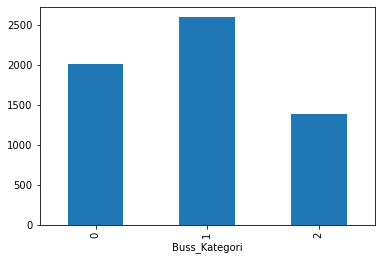

In [18]:
df_bussKat_Count = df.groupby('Buss_Kategori').count()
df_bussKat_Count['Kjøretøy_Kapasitet'].plot.bar()

<AxesSubplot:xlabel='I_Oslo'>

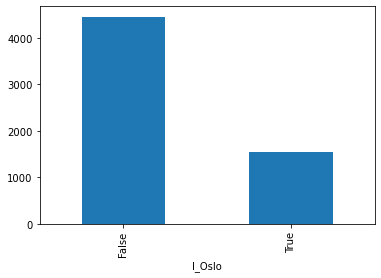

In [19]:
df_I_Oslo_Count = df.groupby('I_Oslo').count()
df_I_Oslo_Count['Fylke'].plot.bar()

We also need to group this feature to be able to visualize it

<AxesSubplot:xlabel='forsinket_kat'>

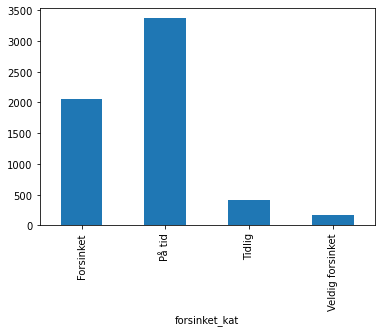

In [20]:
conditions = [
    (df['Forsinket_Ankomst'] < -dt.timedelta(minutes=1)),
    (df['Forsinket_Ankomst'] >= -dt.timedelta(minutes=1)) & (df['Forsinket_Ankomst'] < dt.timedelta(minutes=2)),
    (df['Forsinket_Ankomst'] >= dt.timedelta(minutes=2)) & (df['Forsinket_Ankomst'] < dt.timedelta(minutes=9)),
    (df['Forsinket_Ankomst'] >= dt.timedelta(minutes=9))
]

forsinket_kategorier = ['Tidlig', 'På tid', 'Forsinket', 'Veldig forsinket']

df['forsinket_kat'] = np.select(conditions, forsinket_kategorier)
df_forsinketCount = df.groupby('forsinket_kat').count()
df_forsinketCount['Forsinket_Ankomst'].plot.bar()

<AxesSubplot:xlabel='Forsinket_Avgang_Kat'>

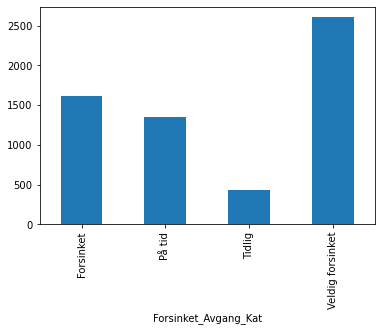

In [21]:
conditions = [
    (df['Forsinket_Avgang'] < dt.timedelta(minutes=0)),
    (df['Forsinket_Avgang'] >= dt.timedelta(minutes=0)) & (df['Forsinket_Avgang'] < dt.timedelta(minutes=1)),
    (df['Forsinket_Avgang'] >= dt.timedelta(minutes=1)) & (df['Forsinket_Avgang'] < dt.timedelta(minutes=2)),
    (df['Forsinket_Avgang'] >= dt.timedelta(minutes=2))
]

avgang_kategorier = ['Tidlig', 'På tid', 'Forsinket', 'Veldig forsinket']

df['Forsinket_Avgang_Kat'] = np.select(conditions, avgang_kategorier)
df_avgangCount = df.groupby('Forsinket_Avgang_Kat').count()
df_avgangCount['Forsinket_Avgang'].plot.bar()